In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import signal
import h5py, time

In [2]:
%matplotlib notebook

In [3]:
def getdata(fname, gain_error=1.0):

    f = h5py.File(fname,'r')
    pos_data = np.array(f['pos_data'])
    quad_data = np.array(f['quad_data'])
    
    ## special comment for Alex:
    ## fsamp is the sampling frequency
    ## in here I read it from the file
    global fsamp
    fsamp = f.attrs['Fsamp']
    fsamp /= f.attrs['downsamp']
    
    ## reshape and extract xyz data
    ## assuming the data contains the correct amount of samples ordered in a correct way
    ## in the reprocessor a testing prcedure has to be implemented 
    pos_xyz = pos_data.reshape(-1,11).T[2:5]
    quad_data = quad_data.reshape(-1,12)
    
    return pos_xyz, quad_data

In [4]:
import sys
sys.path.append('../../../nadavp/new_trap/PythonScripts/')
import BeadDataFile

ModuleNotFoundError: No module named 'BeadDataFile'

In [60]:
## Millicharge analysis with FFT

In [121]:
for i in range(100,1100):
    Ndata1=i
    fname1 = r"/home/data_transfer/data_from_windows/20190724/Bead1/Discharge/Discharge_%d.h5" % Ndata1
    data1, _ = getdata(fname1)
    res=50000
    data_det1=signal.detrend(data1)
    yfft=np.fft.fft(data_det1[1], n=None, axis=-1, norm="ortho")
    ypsd=abs(yfft*np.conjugate(yfft))
    
    nsd8=np.sqrt(ypsd[3050])
    
    with open ('../../AK_SavedFiles/Output305_y_fft.txt', 'a') as f:
        f.write('%d\t%f\n' %(Ndata1, nsd8))

In [63]:
    Ndata1=110
    fname1 = r"/home/data_transfer/data_from_windows/20190724/Bead1/Discharge/Discharge_%d.h5" % Ndata1
    data1, _ = getdata(fname1)
    res=50000
    data_det1=signal.detrend(data1)
    yfft=np.fft.fft(data_det1[1], n=None, axis=-1, norm=None)

In [65]:
abs(yfft[1])

2219103435.168585

In [67]:
yfft[1]

(999461750.9835367+1981286517.467359j)

In [69]:
np.sqrt(yfft[1]*np.conjugate(yfft[1]))

(2219103435.168585+0j)

In [106]:
Ndata=1230
#fname = r'/home/data_transfer/data_from_windows/20190701/Bead2/InitialTest/Data%d.h5' % Ndata
fname = r"/home/data_transfer/data_from_windows/20190724/Bead1/Discharge/Discharge_%d.h5" % Ndata
#fname = r"/home/data_transfer/data_from_windows/20190724/Bead1/TransFunc/TransFuncY_%d.h5" % Ndata
#data, _ = getdata(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
#data = [BDF.x2, BDF.y2, BDF.z2]
fsamp=5000
#res = 2**14
res=50000
data_det=signal.detrend(data)
y_1000=1*data_det[1]
z_1000=1*data_det[2]

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res)

xfft=np.fft.fft(data_det[0], n=None, axis=-1, norm=None)/(res/2)
yfft=np.fft.fft(data_det[1], n=None, axis=-1, norm=None)/(res/2)
zfft=np.fft.fft(data_det[2], n=None, axis=-1, norm=None)/(res/2)

xpsd2=abs(xfft*np.conjugate(xfft))
ypsd2=abs(yfft*np.conjugate(yfft))
zpsd2=abs(zfft*np.conjugate(zfft))

xfft2=np.fft.rfft(data_det[0], n=None, axis=-1, norm=None)/(res/2)
yfft2=np.fft.rfft(data_det[1], n=None, axis=-1, norm=None)/(res/2)
zfft2=np.fft.rfft(data_det[2], n=None, axis=-1, norm=None)/(res/2)

xpsd3=abs(xfft2*np.conjugate(xfft2))
ypsd3=abs(yfft2*np.conjugate(yfft2))
zpsd3=abs(zfft2*np.conjugate(zfft2))


<IPython.core.display.Javascript object>


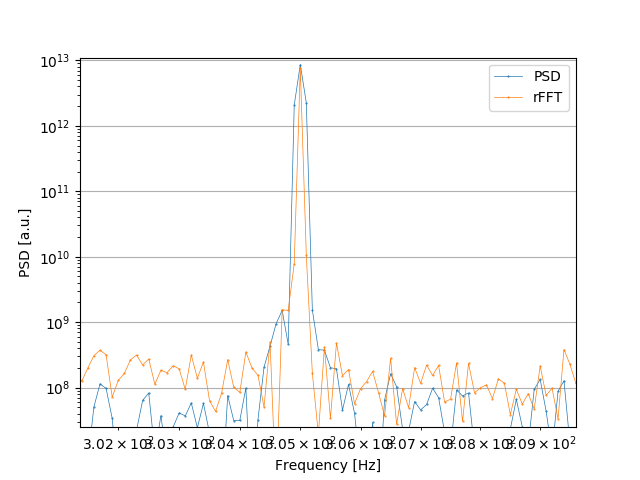

In [67]:
_,ax = plt.subplots()
ax.loglog(freqs, ypsd/3, '.-', label="PSD",markersize=1,linewidth=0.5)
#ax.loglog(freq2,ypsd2, '.-', label="FFT",markersize=1,linewidth=0.5)
ax.loglog(freqs, ypsd3, '.-', label="rFFT",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,2500)
plt.ylim(1e2,1e14)
plt.grid(True)

In [5]:
Fsamp=1000
t=100
x=np.linspace(0,t,(Fsamp*t+1))

In [6]:
y=np.cos(2*np.pi*40*x+np.pi/2)

In [7]:
yfft=np.fft.rfft(y, n=None, axis=-1, norm=None)/(Fsamp*t/2)
absfft=abs(yfft*np.conjugate(yfft))
ypsd2=abs(yfft*np.conjugate(yfft))*t/4
ypsd, freqs = matplotlib.mlab.psd(y, Fs = Fsamp, NFFT = (Fsamp*t))

<IPython.core.display.Javascript object>


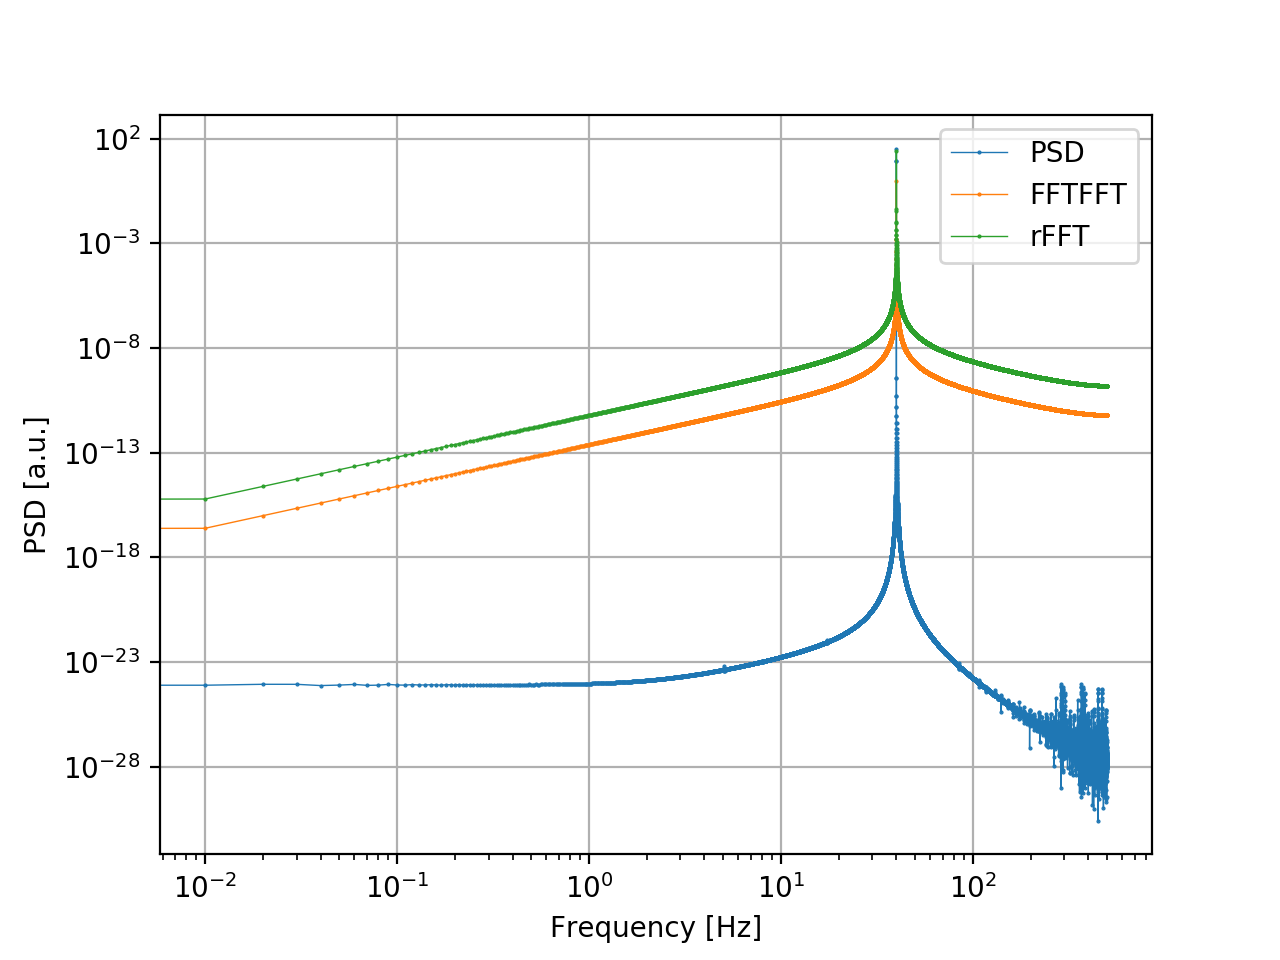

In [8]:
_,ax = plt.subplots()
ax.loglog(freqs, ypsd, '.-', label="PSD",markersize=1,linewidth=0.5)
ax.loglog(freqs , absfft,'.-', label="FFTFFT",markersize=1,linewidth=0.5)
ax.loglog(freqs, ypsd2,'.-', label="rFFT",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,2500)
#plt.ylim(1e-10,1e1)
plt.grid(True)

In [234]:
ypsd2[40*t]/ypsd[40*t]

0.7460903832398498

In [231]:
1/2.984361532959399

0.33508004608555736

In [242]:
freqs

array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 4.9998e+02, 4.9999e+02,
       5.0000e+02])

In [243]:
z=np.zeros((Fsamp*t+1))

In [262]:
z[10000]=Fsamp*t
z[20000]=Fsamp*t
z[30000]=Fsamp*t
z[40000]=Fsamp*t
z[50000]=Fsamp*t
z[60000]=Fsamp*t
z[70000]=Fsamp*t
z[80000]=Fsamp*t
z[90000]=Fsamp*t
z[100000]=Fsamp*t


In [263]:
zfft=np.fft.rfft(z, n=None, axis=-1, norm=None)/(Fsamp*t/2)
zabsfft=abs(yfft*np.conjugate(zfft))
zpsd2=abs(yfft*np.conjugate(zfft))*t/4
zpsd, freqs = matplotlib.mlab.psd(z, Fs = Fsamp, NFFT = (Fsamp*t))

<IPython.core.display.Javascript object>


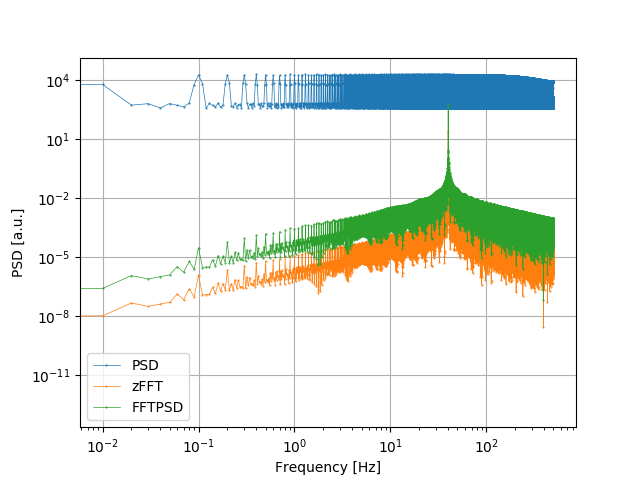

In [265]:
_,ax = plt.subplots()
ax.loglog(freqs, zpsd, '.-', label="PSD",markersize=1,linewidth=0.5)
ax.loglog(freqs ,zabsfft,'.-', label="zFFT",markersize=1,linewidth=0.5)
ax.loglog(freqs, zpsd2,'.-', label="FFTPSD",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,2500)
#plt.ylim(1e-10,1e1)
plt.grid(True)

In [271]:
#with window feature

In [272]:
Fsamp=1000
t=100
x=np.linspace(0,t,(Fsamp*t+1))

In [273]:
y=np.cos(2*np.pi*40*x+np.pi/2)

In [354]:
yfft=np.fft.rfft(y, n=None, axis=-1, norm=None)/(Fsamp*t/2)
absfft=abs(yfft*np.conjugate(yfft))
ypsd2=abs(yfft*np.conjugate(yfft))*t/4
ypsd, freqs = matplotlib.mlab.psd(y, Fs = Fsamp, window=mlab.window_none, NFFT = (Fsamp*t))

<IPython.core.display.Javascript object>


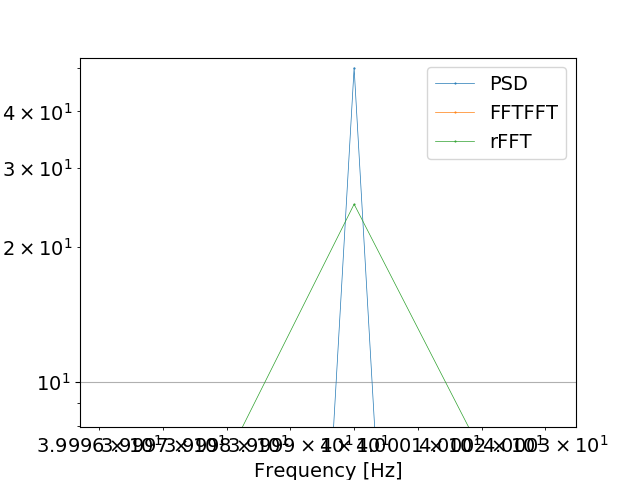

In [355]:
_,ax = plt.subplots()
ax.loglog(freqs, ypsd, '.-', label="PSD",markersize=1,linewidth=0.5)
ax.loglog(freqs , absfft,'.-', label="FFTFFT",markersize=1,linewidth=0.5)
ax.loglog(freqs, ypsd2,'.-', label="rFFT",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,2500)
#plt.ylim(1e-10,1e1)
plt.grid(True)

In [278]:
import random

In [281]:
random.uniform(-1,1)

-0.6143353884629505

In [298]:
zBG=np.zeros((Fsamp*t+1))

In [304]:
for i in range(0,(Fsamp*t)):
    zBG[i]=random.uniform(-1,1)

In [331]:
zBGfft=np.fft.rfft(zBG, n=None, axis=-1, norm=None)/(Fsamp*t/2)
zBGabsfft=abs(zBGfft*np.conjugate(zBGfft))
zBGpsd2=abs(zBGfft*np.conjugate(zBGfft))*t/4
zBGpsd, freqs = matplotlib.mlab.psd(zBG, Fs = Fsamp, NFFT = (Fsamp*t),detrend=None, window=None, noverlap=None, pad_to=None, sides=None, scale_by_freq=None)

In [332]:
zBG[5]

0.6492487601157197

<IPython.core.display.Javascript object>


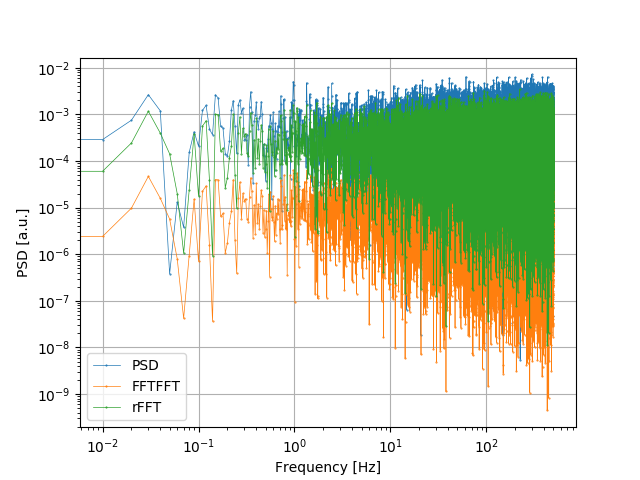

In [314]:
_,ax = plt.subplots()
ax.loglog(freqs, zBGpsd, '.-', label="PSD",markersize=1,linewidth=0.5)
ax.loglog(freqs , zBGabsfft,'.-', label="FFTFFT",markersize=1,linewidth=0.5)
ax.loglog(freqs, zBGpsd2,'.-', label="rFFT",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,2500)
#plt.ylim(1e-10,1e1)
plt.grid(True)

In [ ]:
#Let's use Chas's way of normalization

In [346]:
Fsamp=1000
t=100
x=np.linspace(0,t,(Fsamp*t+1))

In [347]:
y=np.cos(2*np.pi*40*x+np.pi/2)

In [348]:
fft = np.fft.rfft(y)

In [349]:
norm = np.sqrt(2 / ((Fsamp*t+1) * Fsamp))

In [350]:
psd = norm**2 * (fft * fft.conj()).real

In [351]:
psdpsd=matplotlib.mlab.psd(x, NFFT=None, Fs=None, window=mlab.window_none)

<IPython.core.display.Javascript object>


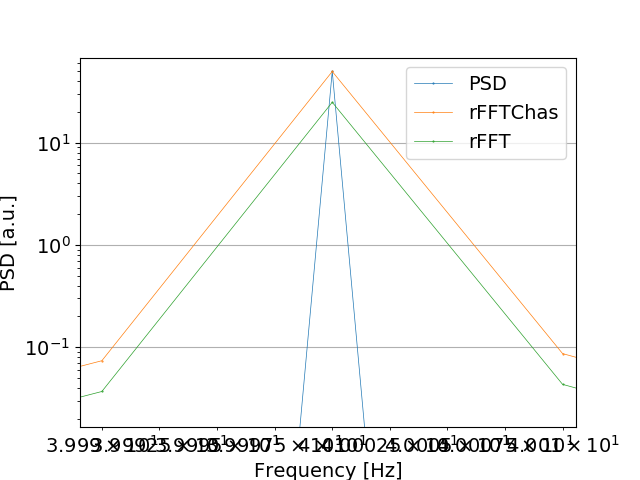

In [352]:
_,ax = plt.subplots()
ax.loglog(freqs, ypsd, '.-', label="PSD",markersize=1,linewidth=0.5)
ax.loglog(freqs, psd,'.-', label="rFFTChas",markersize=1,linewidth=0.5)
ax.loglog(freqs, ypsd2,'.-', label="rFFT",markersize=1,linewidth=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,2500)
#plt.ylim(1e-10,1e1)
plt.grid(True)

In [336]:
psd[4000]

49.737358803266645

In [337]:
ypsd[4000]

33.33299999998986

In [338]:
ypsd2[4000]

24.868928088427335

<IPython.core.display.Javascript object>


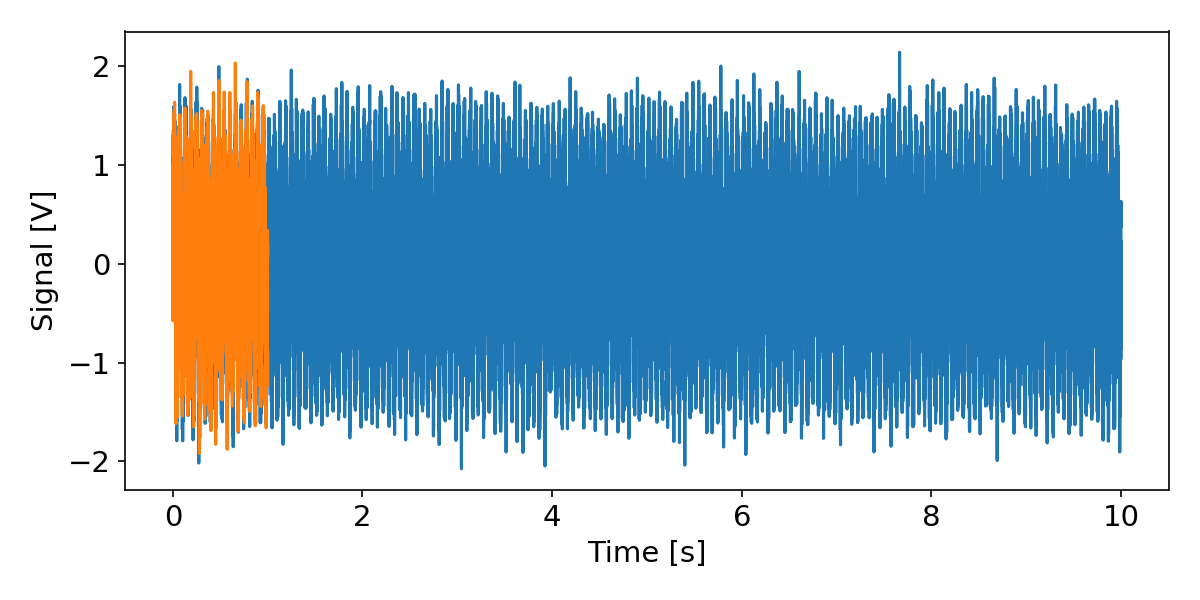

<IPython.core.display.Javascript object>


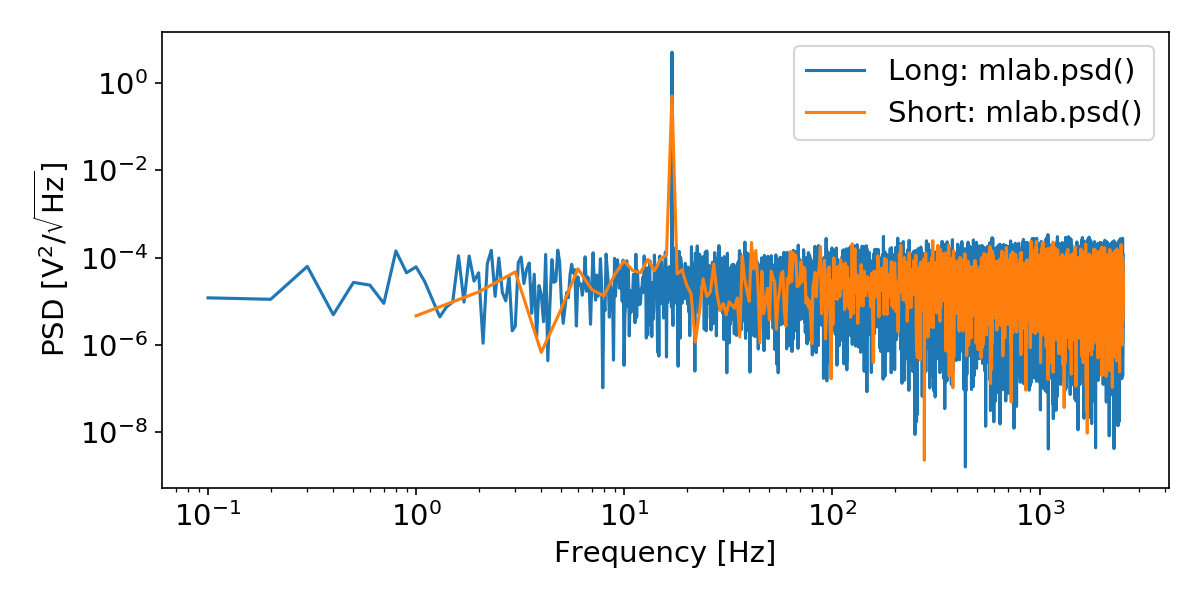

<IPython.core.display.Javascript object>


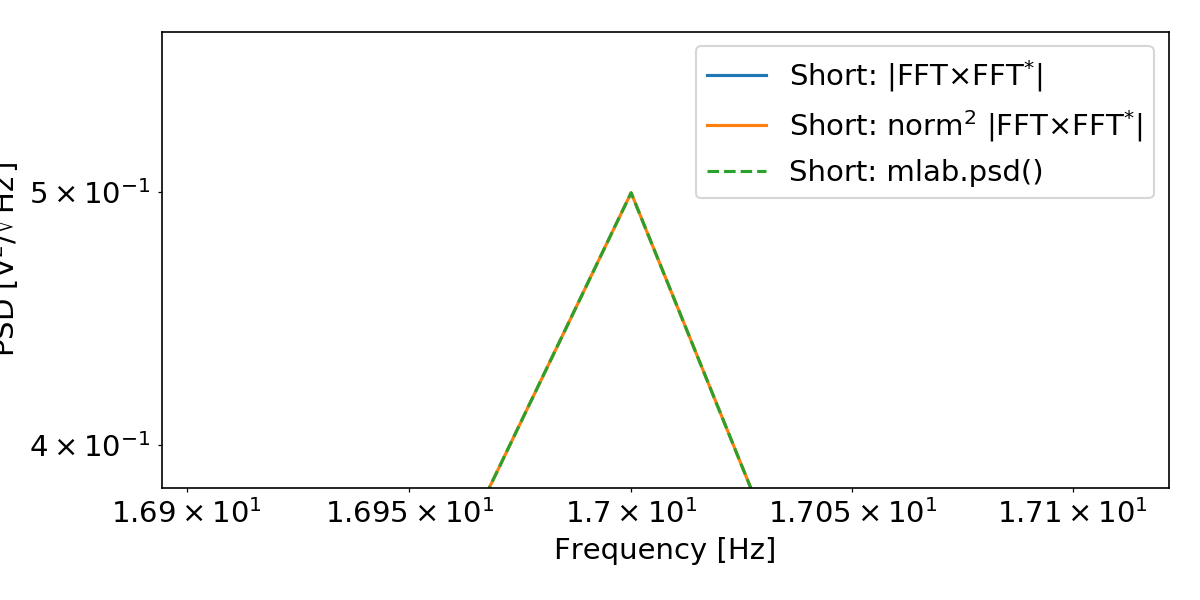

<IPython.core.display.Javascript object>


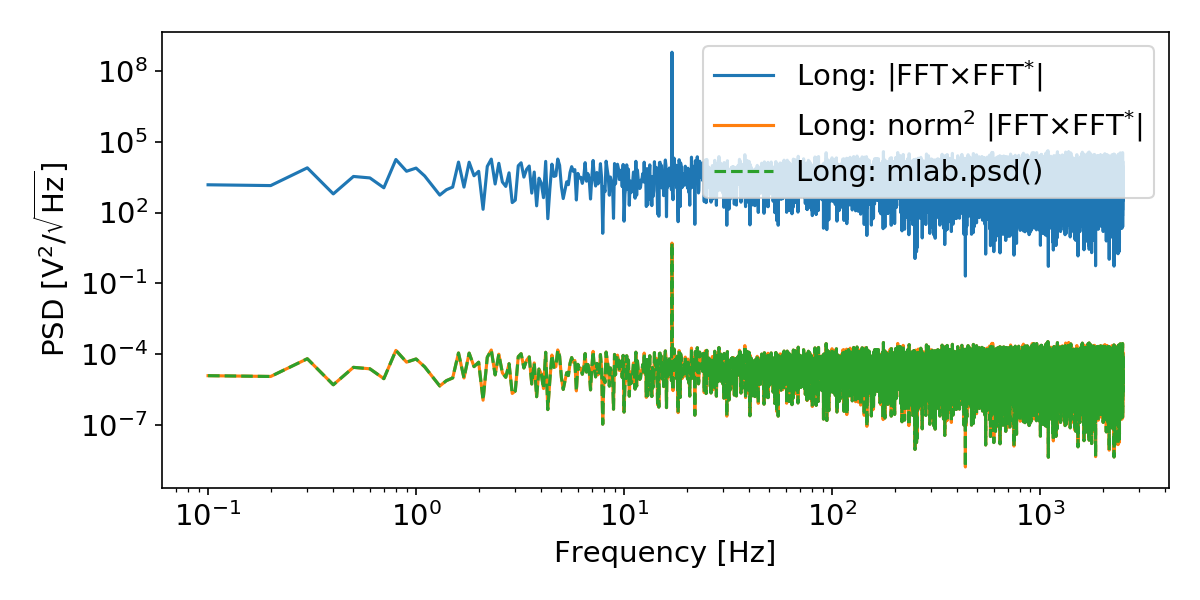

In [353]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.rcParams.update({'font.size': 14})


t_short = 1.
t_long = 10.

fsamp = 5000.

freq = 17.
amp = 1

noise_rms = 0.3


#####

def fft_norm(N, fsamp):
    "Factor to normalize FFT to ASD units"
    return np.sqrt(2 / (N * fsamp))

dt = 1. / fsamp
nsamp_short = int(t_short / dt)
nsamp_long = int(t_long / dt)

time_short = np.arange(nsamp_short) * dt
time_long= np.arange(nsamp_long) * dt

sig_short = amp * np.sin(2 * np.pi * freq * time_short) + noise_rms * np.random.randn(nsamp_short)
sig_long = amp * np.sin(2 * np.pi * freq * time_long) + noise_rms * np.random.randn(nsamp_long)

psd_short, freqs_short = mlab.psd(sig_short, NFFT=nsamp_short, Fs=fsamp, window=mlab.window_none)
psd_long, freqs_long = mlab.psd(sig_long, NFFT=nsamp_long, Fs=fsamp, window=mlab.window_none)

fftfreqs_short = np.fft.rfftfreq(nsamp_short, d=dt)
fftfreqs_long = np.fft.rfftfreq(nsamp_long, d=dt)

fft_short = np.fft.rfft(sig_short)
fft_long = np.fft.rfft(sig_long)




amps = []
for i in range(1000):
    norm_test = fft_norm(nsamp_short, fsamp)
    sig_short_test = amp * np.sin(2 * np.pi * freq * time_short) + noise_rms * np.random.randn(nsamp_short)
    fftfreqs_short_test = np.fft.rfftfreq(nsamp_short, d=dt)
    fft_short_test = np.fft.rfft(sig_short_test)

    drive_bin = np.argmax(np.abs(fft_short_test))

    test_amp = norm_test * np.sqrt((fft_short_test * fft_short_test.conj()).real[drive_bin])
    test_amp *= np.sqrt(2) * (1.0 / np.sqrt(t_short))
    amps.append(test_amp)

#print '   Actual amplitude : {:0.3f}'.format(amp)
#print 'Recovered amplitude : {:0.3f}+-{:0.3f}'.format(np.mean(amps), np.std(amps))




# Plot signals
plt.figure(figsize=(8,4),dpi=150)
plt.plot(time_long, sig_long)
plt.plot(time_short, sig_short)
plt.xlabel('Time [s]')
plt.ylabel('Signal [V]')
plt.tight_layout()

# Plot mlab PSDs, ignoring the zero-frqeuency bin
plt.figure(figsize=(8,4),dpi=150)
plt.loglog(freqs_long[1:], psd_long[1:], label='Long: mlab.psd()')
plt.loglog(freqs_short[1:], psd_short[1:], label='Short: mlab.psd()')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V$^2$/$\sqrt{\mathrm{Hz}}$]')
plt.legend(loc=1)
plt.tight_layout()


norm_short = fft_norm(nsamp_short, fsamp)
plt.figure(figsize=(8,4),dpi=150)
plt.loglog(fftfreqs_short[1:], (fft_short[1:] * fft_short[1:].conj()).real, label=r'Short: |FFT$\times$FFT$^{*}$|')
plt.loglog(fftfreqs_short[1:], norm_short**2 * (fft_short [1:]* fft_short[1:].conj()).real, \
            label=r'Short: norm$^2$ |FFT$\times$FFT$^{*}$|')
plt.loglog(freqs_short[1:], psd_short[1:], '--', label='Short: mlab.psd()')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V$^2$/$\sqrt{\mathrm{Hz}}$]')
plt.legend(loc=1)
plt.tight_layout()


norm_long = fft_norm(nsamp_long, fsamp)
plt.figure(figsize=(8,4),dpi=150)
plt.loglog(fftfreqs_long[1:], (fft_long[1:] * fft_long[1:].conj()).real, label=r'Long: |FFT$\times$FFT$^{*}$|')
plt.loglog(fftfreqs_long[1:], norm_long**2 * (fft_long [1:]* fft_long[1:].conj()).real, \
            label=r'Long: norm$^2$ |FFT$\times$FFT$^{*}$|')
plt.loglog(freqs_long[1:], psd_long[1:], '--', label='Long: mlab.psd()')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V$^2$/$\sqrt{\mathrm{Hz}}$]')
plt.legend(loc=1)
plt.tight_layout()

plt.show()
